In [97]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [98]:
df = pd.read_csv(os.getcwd()[0:-11] + "\\Cleansed_data\\Cleaned_2\\cleaned_data.csv")

In [99]:
# Splitting data into 2 categories.
df_failure = df.loc[df["result1"]==0]
df_success = df.loc[df["result1"]==1]

### Grouping by

In [100]:
# Putting frequencies and means into variables.
count_success = len(df_success)
count_failure = len(df_failure)

# Frequency of education levels.
education_success = (df_success.groupby(['education']).size()/count_success).reset_index(name='frequency')
education_failure = (df_failure.groupby(['education']).size()/count_failure).reset_index(name='frequency')

# Median of views.
median_views_success = df_success["views"].median()
median_views_failure = df_failure["views"].median()

# Mean of work time and counts for group by.
avg_worktime_success = df_success["work_time"].mean()
avg_worktime_failure = df_failure["work_time"].mean()

worktime_group_count_success = (df_success.groupby(["work_time"]).size()/count_success).reset_index(name='frequency')
worktime_group_count_failure = (df_failure.groupby(["work_time"]).size()/count_failure).reset_index(name='frequency')

# Frequency of 'salary not disclosed'.
no_salary_success = len(df_success["salary"].loc[df_success["salary"] == "nie podano wynagrodzenia"])/count_success
no_salary_failure = len(df_failure["salary"].loc[df_failure["salary"] == "nie podano wynagrodzenia"])/count_failure

# Counts for vacancies group by.
vacancies_success = (df_success.groupby(["vacancies"]).size()/count_success).reset_index(name='frequency')
vacancies_failure = (df_failure.groupby(["vacancies"]).size()/count_failure).reset_index(name='frequency')

# Average length of responsibilities description.
avg_responsibility_len_success = df_success['responsibilities'].str.len().mean()
avg_responsibility_len_failure = df_failure['responsibilities'].str.len().mean()

# Average length of necessary requirements description.
avg_req_len_success = df_success['requirements1'].str.len().mean()
avg_req_len_failure = df_failure['requirements1'].str.len().mean()

### Plotting charts

In [101]:
# A function creating a grouped bar chart displaying differences between classes, for given arguments.
# Based on an example from the Matplotlib documentation:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

def display_grouped_bar_chart(x_labels:tuple, success_attributes:tuple, failure_attributes:tuple, xlabel:str, ylabel:str, title:str, upper_y_value:float, placement:str):
    
    attributes = {
        'Success': success_attributes,
        'Failure': failure_attributes
    }
    
    x = np.arange(len(x_labels))  # the label locations
    bar_width = 0.25  # the width of the bars
    multiplier = 0
    
    fig, ax = plt.subplots(layout='constrained')
    
    for trait_label, value in attributes.items():
        offset = bar_width * multiplier
        rects = ax.bar(x + offset, value, bar_width, label=trait_label)
        ax.bar_label(rects, padding=3)
        multiplier += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + bar_width, x_labels)
    ax.legend(loc=placement, ncols=2)
    ax.set_ylim(0, upper_y_value)
    
    plt.show()

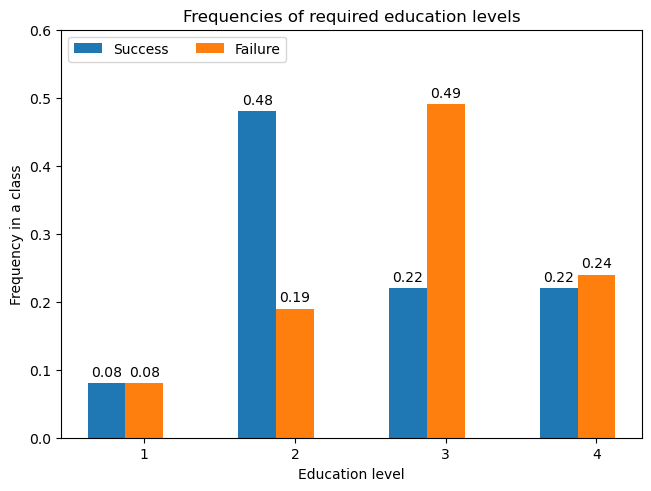

In [102]:
# Required education level comparison.

# First, we're rounding numbers for more clarity in the chart.
rounded_ed_success_values = []
rounded_ed_failure_values = []

for number in education_success["frequency"].values:
    rounded_ed_success_values.append(round(number, 2))
for number in education_failure["frequency"].values:
    rounded_ed_failure_values.append(round(number, 2))

display_grouped_bar_chart(
    ('1', '2', '3', '4'), rounded_ed_success_values,
    rounded_ed_failure_values, 'Education level',
    'Frequency in a class', 'Frequencies of required education levels', 0.60, placement='upper left'
)

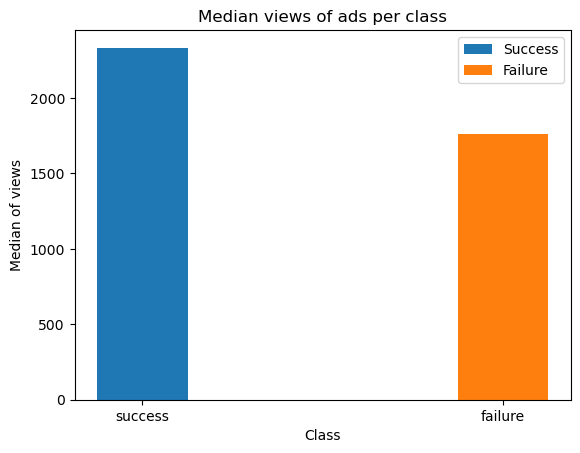

In [103]:
# Median views on the website.

width = 0.25
plt.bar('success', median_views_success, width)
plt.bar('failure', median_views_failure, width)

plt.title('Median views of ads per class')
plt.xlabel('Class')
plt.ylabel('Median of views')
plt.legend(['Success', 'Failure'])

plt.show()

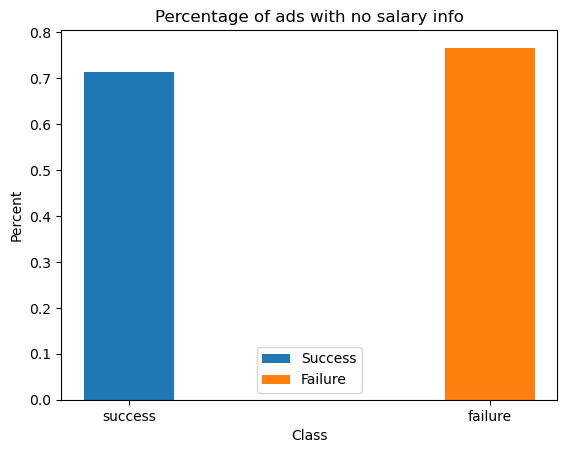

In [104]:
# Ads with no salary info given (percentage).

width = 0.25
plt.bar('success', no_salary_success, width)
plt.bar('failure', no_salary_failure, width)

plt.title('Percentage of ads with no salary info')
plt.xlabel('Class')
plt.ylabel('Percent')
plt.legend(['Success', 'Failure'])

plt.show()

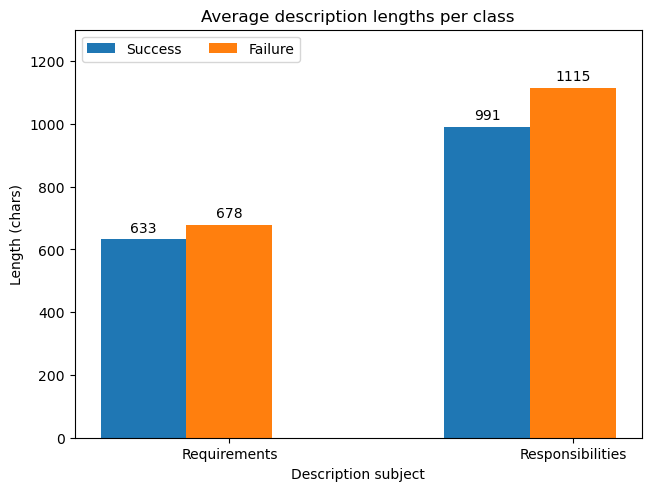

In [105]:
# Average length (characters) of requirements description per ad.

display_grouped_bar_chart(
    ('Requirements', 'Responsibilities'), (round(avg_req_len_success,0), round(avg_responsibility_len_success,0)), (round(avg_req_len_failure,0), round(avg_responsibility_len_failure,0)), 'Description subject',
    'Length (chars)', 'Average description lengths per class', 1300, placement='upper left'
)

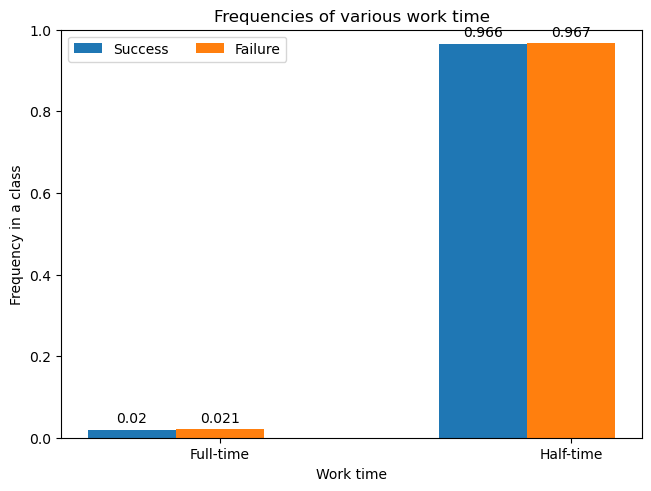

In [106]:
# Part of full-time frequency.

# Visualising only half-time and full-time proportions, since they're substantially more frequent than other groups in both classes.
# Other proportions, due to small number of ads they appear in, seem to be insignificant.
worktime_group_count_success_for_chart = worktime_group_count_success.loc[(worktime_group_count_success['work_time']==1.0) | (worktime_group_count_success['work_time']==0.5)]
worktime_group_count_failure_for_chart = worktime_group_count_failure.loc[(worktime_group_count_failure['work_time']==1.0) | (worktime_group_count_failure['work_time']==0.5)]

# Rounding numbers.
rounded_worktime_success_values = []
rounded_worktime_failure_values = []

for number in worktime_group_count_success_for_chart["frequency"].values:
    rounded_worktime_success_values.append(round(number, 3))
for number in worktime_group_count_failure_for_chart["frequency"].values:
    rounded_worktime_failure_values.append(round(number, 3))

display_grouped_bar_chart(
    ('Full-time', 'Half-time'), rounded_worktime_success_values, rounded_worktime_failure_values, 'Work time', 'Frequency in a class', 'Frequencies of various work time', 1.0, placement='upper left'
)

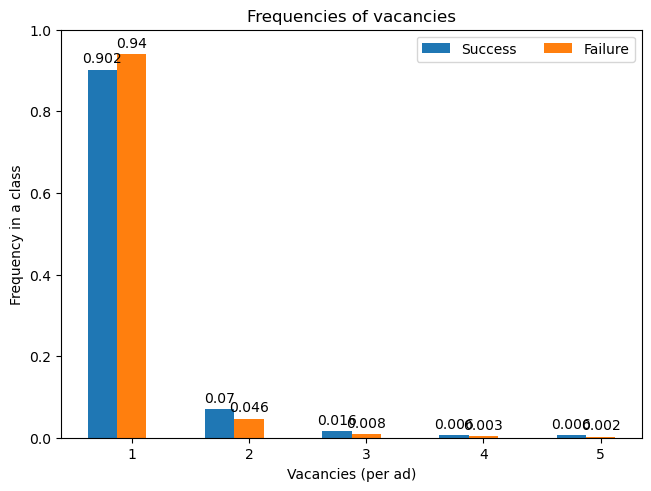

In [108]:
# Frequencies of the number of vacancies (per ad) for both classes.

# Rounding numbers.
rounded_vacancies_success_values = []
rounded_vacancies_failure_values = []

for number in vacancies_success["frequency"].values:
    rounded_vacancies_success_values.append(round(number, 3))
for number in vacancies_failure["frequency"].values:
    rounded_vacancies_failure_values.append(round(number, 3))

display_grouped_bar_chart(
    ('1', '2', '3', '4', '5'), rounded_vacancies_success_values, rounded_vacancies_failure_values, 'Vacancies (per ad)', 'Frequency in a class', 'Frequencies of vacancies', 1.0, placement='upper right'
)